In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mat = scipy.io.loadmat('../ISRUC-Sleep Dataset/Subgroup 3/Subject 1/subject1.mat')

In [3]:
labels = np.loadtxt('../ISRUC-Sleep Dataset/Subgroup 3/Subject 1/1/1_1.txt')[:-30]

In [4]:
np.place(labels, labels==5, [4])

In [5]:
data = np.array(mat['C3_A2'])

In [6]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0.0: 162, 1.0: 114, 2.0: 369, 3.0: 178, 4.0: 101}

In [9]:
from modwt import modwt, modwtmra

ET = []

WT = []

for element in data:
    wt = modwt(element, 'db4', 6)
    WT.append(wt)
    E = []
    for w in wt:
        E.append(np.sum(np.abs(w) ** 2))
    ET.append(E)

In [ ]:
PET = []

for E in ET:
    PE = []
    for element in E:
        PE.append(element/np.sum(E))
    PET.append(PE)    

In [ ]:
MT = []

for W in WT:
    M = []
    for element in W:        
        M.append(np.mean(w))
    MT.append(M)

In [ ]:
StdT = []

for W in WT:
    Std = []
    for element in W:        
        Std.append(np.std(w))
    StdT.append(Std)

In [ ]:
PT = []

for element in data:
    PT.append(np.max(element) - np.min(element))

In [16]:
# E0 = np.sum(np.abs(wt[0]) ** 2)
# E1 = np.sum(np.abs(wt[1]) ** 2)
# E2 = np.sum(np.abs(wt[2]) ** 2)
# E3 = np.sum(np.abs(wt[3]) ** 2)
# E4 = np.sum(np.abs(wt[4]) ** 2)
# E5 = np.sum(np.abs(wt[5]) ** 2)

In [17]:
# PE0 = E0 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE1 = E1 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE2 = E2 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE3 = E3 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE4 = E4 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE5 = E5 / (E0 + E1 + E2 + E3 + E4 + E5)

In [18]:
# M0 = np.mean(wt[0])
# M1 = np.mean(wt[1])
# M2 = np.mean(wt[2])
# M3 = np.mean(wt[3])
# M4 = np.mean(wt[4])
# M5 = np.mean(wt[5])

In [19]:
# Std0 = np.std(wt[0])
# Std1 = np.std(wt[1])
# Std2 = np.std(wt[2])
# Std3 = np.std(wt[3])
# Std4 = np.std(wt[4])
# Std5 = np.std(wt[5])

In [20]:
# P0 = np.max(data[0]) - np.min(data[0])

In [ ]:
print('ET: ', len(ET))
print('PET: ', len(PET))
print('MT: ', len(MT))
print('StdT: ', len(StdT))
print('PT: ', len(PT))

In [10]:
# data_new = []

ET_np = np.array(ET)
# PET_np = np.array(PET)
# MT_np = np.array(MT)
# StdT_np = np.array(StdT)
# PT_np = np.array(PT)


# for i in range(len(data)):
#     element = []
#     element.append(data[i])
#     element.append(ET_np[i])
#     element.append(PET_np[i])
#     element.append(MT_np[i])
#     element.append(StdT_np[i])
#     element.append(PT_np[i])
#     print(np.array(element).shape)
#     data_new.append(element)

In [ ]:
data_new = np.array(data_new)

In [ ]:
WT_np = np.array(WT)

In [ ]:
data.shape

In [11]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras import Input

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [27]:
ET_np_p = preprocessing.scale(ET_np)

In [28]:
ET_np_p = np.reshape(ET_np_p, (ET_np_p.shape[0], 1, ET_np_p.shape[1]))

In [27]:
# import random

# random.shuffle(data_p)

In [ ]:
# ET_np_p.shape

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(ET_np_p, labels, test_size=0.33, random_state=42)

In [30]:
# train_data = ET_np_p[:691]
# test_data = ET_np_p[691:]

# train_labels = labels[:691]
# test_labels = labels[691:]

In [31]:
# train_data.shape

In [106]:
# Embedding
max_features = 30000
maxlen = 7
# input_shape = [7,6000]
embedding_size = 128

# Convolution
kernel_size = 4
filters = 64
pool_size = 2

# LSTM
lstm_output_size = 14

# Training
batch_size = 20
epochs = 40

In [107]:
model = Sequential()
# model.add(Embedding(max_features, embedding_size, input_length=maxlen))
# model.add(Dropout(0.25))
# model.add(Conv1D(filters,
#                  kernel_size,
#                  padding='valid',
#                  activation='relu',
#                  strides=2))
# model.add(MaxPooling1D(pool_size=pool_size))

model.add(LSTM(units=128,
               input_shape=(1,7), return_sequences = True))
model.add(Dropout(0.25))
model.add(LSTM(units=128, activation='relu',
               input_shape=(1,7)))
# model.add(LSTM(units=256, activation='relu', input_shape=(1,7)))
# model.add(Dropout(0.25))
# model.add(LSTM(units=512, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Activation('softmax'))

In [108]:
# model = Sequential()
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(5, activation='softmax'))

In [109]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [110]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 619 samples, validate on 305 samples
Epoch 1/40
619/619 [==============================] - 3s 4ms/sample - loss: 1.5922 - acc: 0.4313 - val_loss: 1.5544 - val_acc: 0.4656
Epoch 2/40
619/619 [==============================] - 0s 358us/sample - loss: 1.5123 - acc: 0.4701 - val_loss: 1.4499 - val_acc: 0.4885
Epoch 3/40
619/619 [==============================] - 0s 351us/sample - loss: 1.3835 - acc: 0.4782 - val_loss: 1.3621 - val_acc: 0.5049
Epoch 4/40
619/619 [==============================] - 0s 342us/sample - loss: 1.2734 - acc: 0.4976 - val_loss: 1.3099 - val_acc: 0.5344
Epoch 5/40
619/619 [==============================] - 0s 335us/sample - loss: 1.1697 - acc: 0.5412 - val_loss: 1.2123 - val_acc: 0.5803
Epoch 6/40
619/619 [==============================] - 0s 349us/sample - loss: 1.0428 - acc: 0.6284 - val_loss: 1.1029 - val_acc: 0.6197
Epoch 7/40
619/619 [==============================] - 0s 342us/sample - loss: 0.9105 - acc: 0.6850 - val_loss: 1.0069 - val_acc: 0.6525
Epoc

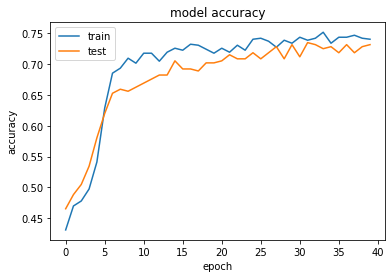

In [111]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

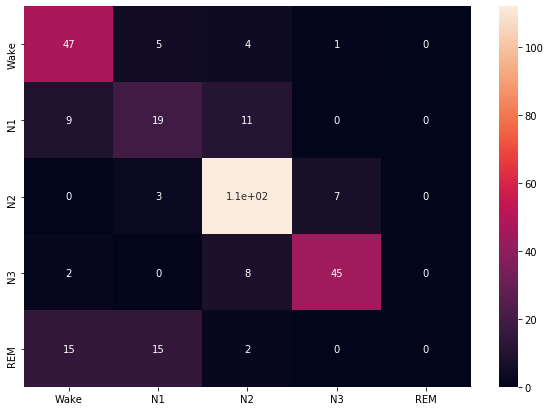

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = model.predict(test_data)

test_labels = test_labels.astype('int32')

confusion_matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))

df_cm = pd.DataFrame(confusion_matrix, index = ['Wake', 'N1', 'N2', 'N3', 'REM'],
                  columns = ['Wake', 'N1', 'N2', 'N3', 'REM'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
# y_pred.shape